<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Task 1 Dataset Selection and Preprocessing
# Step 1 import libraries and moudules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import zipfile



In [3]:
#Step 2 download dataset
from google.colab import drive
drive.mount('/content/drive')

# unzip dataset
with zipfile.ZipFile("/content/archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

# List extracted files
import os
print(os.listdir("/content"))

df = pd.read_csv("/content/Wholesale customers data.csv")
print(df.head())


Mounted at /content/drive
['.config', 'drive', 'Wholesale customers data.csv', 'archive.zip', 'sample_data']
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
# explore dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2

In [5]:
# Step 3 handling missing value
# df.dropna(inplace=True)
# Without missing value

In [6]:
# Step 4 Encode Categorical Variables
# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(categorical_cols)
print(numeric_cols)

# insight: Without category data

Index([], dtype='object')
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [7]:
# Step 5: Feature Scaling / Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
print(X_scaled)

print("Scaled Data Shape:", X_scaled.shape)


[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]
Scaled Data Shape: (440, 8)


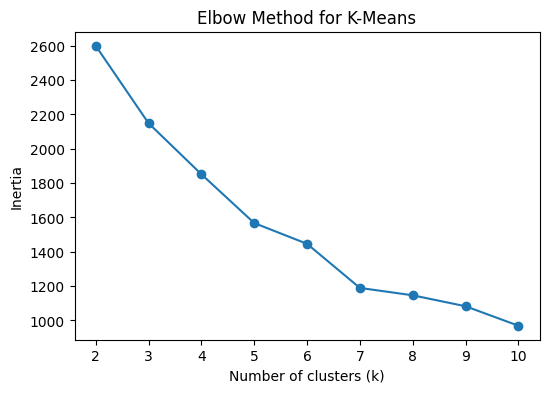

In [8]:
# Task 2 Clustering:
# 1 K-MEANS CLUSTERING
# Determine optimal number of clusters using Elbow Method
inertia_list = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia_list, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


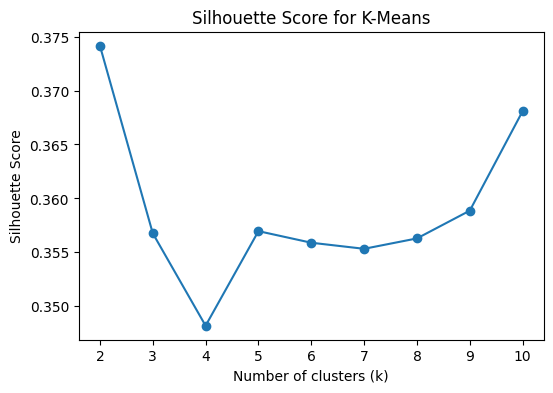

In [9]:
# Determine optimal number using Silhouette Score
silhouette_list = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_list.append(score)

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_list, marker='o')
plt.title('Silhouette Score for K-Means')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [10]:
# Choose optimal k (for example, pick k with highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_list)]
print("Optimal number of clusters (K-Means):", optimal_k)

Optimal number of clusters (K-Means): 2


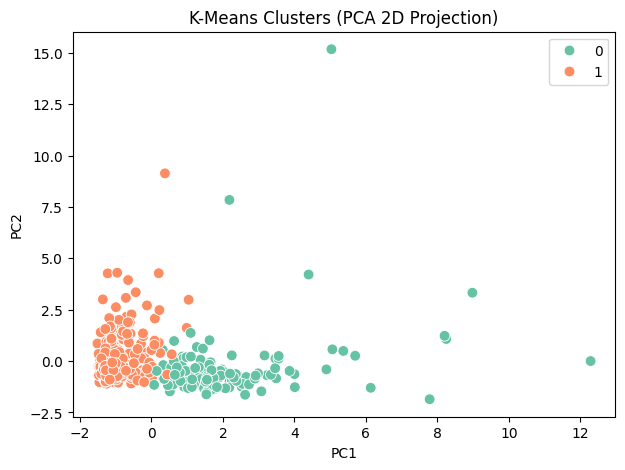

In [11]:
# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Visualize clusters using first two PCA components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set2', s=60)
plt.title('K-Means Clusters (PCA 2D Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

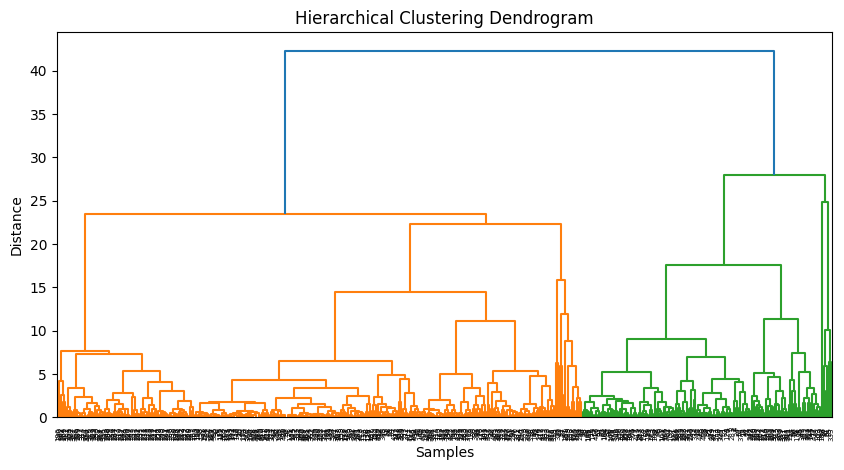

In [12]:
# 2 HIERARCHICAL CLUSTERING
# Create linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


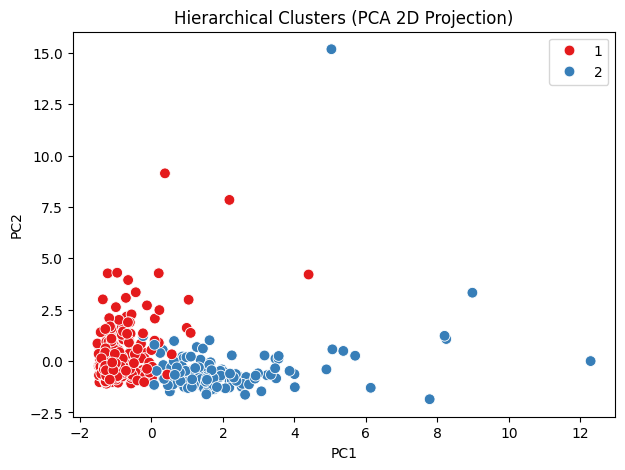

In [13]:
# Cut dendrogram to form clusters
# Let's use the same number of clusters as K-Means for comparison
hc_labels = fcluster(linkage_matrix, t=optimal_k, criterion='maxclust')
df['Hierarchical_Cluster'] = hc_labels - 1  # shift to 0-based index

# Visualize hierarchical clusters using PCA
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hc_labels, palette='Set1', s=60)
plt.title('Hierarchical Clusters (PCA 2D Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [14]:
# Optional - compare cluster sizes
print("K-Means Cluster Sizes:")
print(df['KMeans_Cluster'].value_counts())
print("\nHierarchical Cluster Sizes:")
print(df['Hierarchical_Cluster'].value_counts())

K-Means Cluster Sizes:
KMeans_Cluster
1    300
0    140
Name: count, dtype: int64

Hierarchical Cluster Sizes:
Hierarchical_Cluster
0    298
1    142
Name: count, dtype: int64


Explained variance ratio by PCA components: [0.38750123 0.22374588]


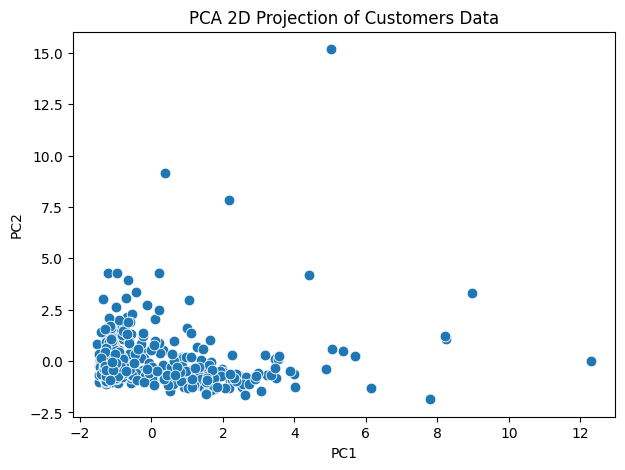

In [15]:
# Task 3 Dimensionality Reduction:
# PCA - Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 2D projection
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)

# Visualize PCA projection
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], s=60)
plt.title('PCA 2D Projection of Customers Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


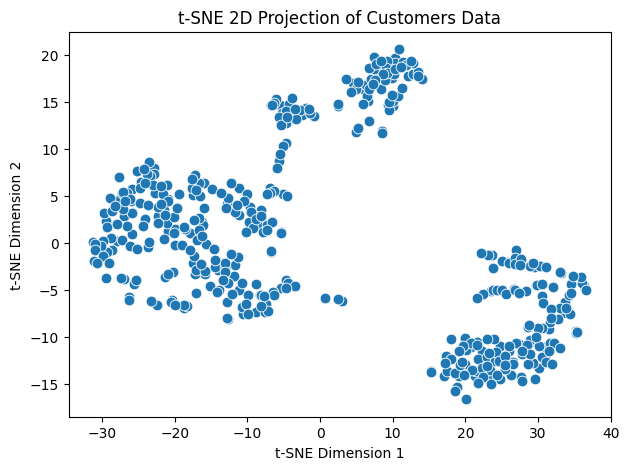

In [20]:
# t-SNE - t-Distributed Stochastic Neighbor Embedding
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE projection
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], s=60)
plt.title('t-SNE 2D Projection of Customers Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

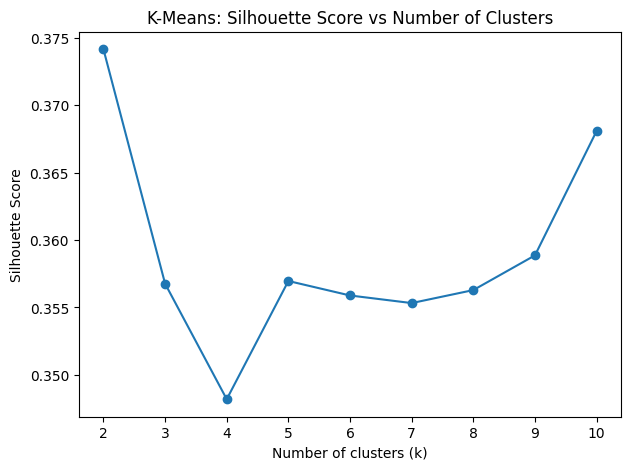

In [28]:
# Task 4 Model Evaluation: Clustering Performance
# Evaluate K-Means Clustering

# Try different cluster numbers
silhouette_scores_kmeans = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores_kmeans.append(sil_score)

# Plot Silhouette Score trend
plt.figure(figsize=(7,5))
plt.plot(K, silhouette_scores_kmeans, marker='o')
plt.title('K-Means: Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [29]:
# Find the best k
best_k_kmeans = K[silhouette_scores_kmeans.index(max(silhouette_scores_kmeans))]
print(f"Best number of clusters for K-Means: {best_k_kmeans}")
print(f"Highest Silhouette Score (K-Means): {max(silhouette_scores_kmeans):.3f}")

# Final K-Means with best k
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels


Best number of clusters for K-Means: 2
Highest Silhouette Score (K-Means): 0.374


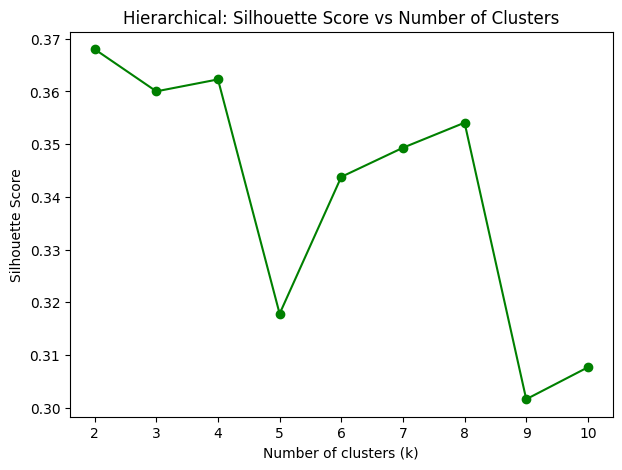

Best number of clusters for Hierarchical Clustering: 2
Highest Silhouette Score (Hierarchical): 0.368


In [27]:
# Evaluate Hierarchical Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
silhouette_scores_hier = []

for k in K:
    hier = AgglomerativeClustering(n_clusters=k)
    hier_labels = hier.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, hier_labels)
    silhouette_scores_hier.append(sil_score)

# Plot Silhouette Score trend
plt.figure(figsize=(7,5))
plt.plot(K, silhouette_scores_hier, marker='o', color='green')
plt.title('Hierarchical: Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the best k for Hierarchical
best_k_hier = K[silhouette_scores_hier.index(max(silhouette_scores_hier))]
print(f"Best number of clusters for Hierarchical Clustering: {best_k_hier}")
print(f"Highest Silhouette Score (Hierarchical): {max(silhouette_scores_hier):.3f}")

# Final Hierarchical with best k
hier = AgglomerativeClustering(n_clusters=best_k_hier)
hier_labels = hier.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = hier_labels

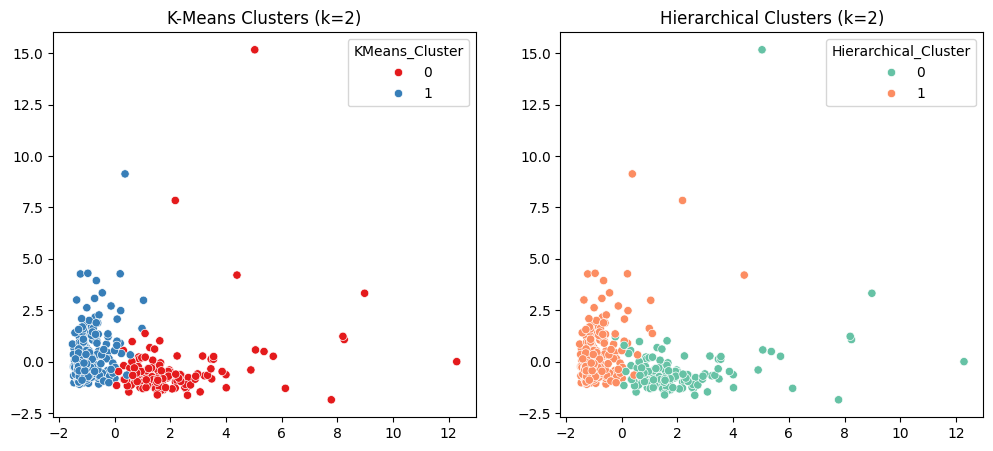

In [30]:
# Visual Comparison (using PCA for 2D visualization)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['KMeans_Cluster'], palette='Set1', ax=axes[0])
axes[0].set_title(f'K-Means Clusters (k={best_k_kmeans})')

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Hierarchical_Cluster'], palette='Set2', ax=axes[1])
axes[1].set_title(f'Hierarchical Clusters (k={best_k_hier})')

plt.show()

Insight:

The Hierarchical Clustering model achieved the highest Silhouette Score of 0.368 when the number of clusters (k=2) was used.
This indicates that dividing the customers into two major groups provides the most distinct segmentation pattern for this dataset.
However, the moderate Silhouette value suggests that there may still be some overlap between clusters, implying that the underlying customer structure may not be strongly separable.

Task 5 ： Deployment and Monitoring:

Deployment and Monitoring
1. Hypothetical Deployment Scenario

In a business context, the best-performing model — K-Means Clustering (k = 2, Silhouette Score = 0.374) — could be deployed as part of a Customer Segmentation System within a retail or wholesale company.
The model would automatically classify each new customer into one of two main segments:

Cluster 0: High-spending, frequent customers

Cluster 1: Low-spending, infrequent customers

This segmentation can help the marketing team design personalized promotions, credit policies, and loyalty programs, improving both customer satisfaction and business profitability. The model could be deployed as a background service integrated into the company’s CRM or cloud data platform, running either in batch mode (e.g., weekly updates) or in real time as new customer data arrives.

2. Potential Deployment Challenges
Challenge	Description
Latency	Real-time customer classification may require fast model inference. If the model needs to process large data streams, latency may increase.
Scalability	As the customer base grows, the system must handle larger datasets efficiently, especially when performing data standardization and clustering.
Maintenance	Customer behavior and market trends change over time, leading to concept drift. The deployed model may gradually lose accuracy.
Integration	The model needs to interact seamlessly with existing systems (CRM, database, or web services), requiring proper API design and data pipeline management.
3. Monitoring and Updating Strategies
Monitoring Aspect	Proposed Strategy
Model Performance	Regularly compute metrics such as Silhouette Score and cluster compactness (inertia) to assess clustering quality.
Data Drift Detection	Compare statistical distributions of new customer data with historical data to detect major shifts in purchasing behavior.
Scheduled Retraining	Retrain the model periodically (e.g., every 3–6 months) or when performance metrics fall below a threshold (e.g., Silhouette < 0.30).
Version Control	Use tools such as MLflow or DVC to manage model versions, enabling easy rollback to a stable version if performance declines.
Visualization Dashboard	Implement a monitoring dashboard (e.g., using Power BI, Streamlit, or Tableau) to visualize cluster size changes, average spending, and customer transitions between clusters.
4. Example Monitoring Workflow

The deployed model runs as part of a weekly batch job on a cloud platform.
Each week, new transaction data is collected and standardized using the same StandardScaler parameters as in training.
The clustering module assigns each customer to a segment, and results are stored in the CRM.
If the average Silhouette Score for the new data drops below 0.30, an alert is triggered for automatic retraining using the most recent six months of data.

5. Summary

Deploying the K-Means clustering model in production enables continuous customer segmentation and business insight generation.
However, challenges related to latency, scalability, and model degradation must be carefully managed.
By implementing automated monitoring, retraining schedules, and version control, the organization can ensure the model remains reliable, up-to-date, and aligned with evolving customer behavior.